## Processing raw EEG data

+ Prepare EEG 
1. Subtract reference (mastoids)
2. Detrend 
3. Filter
4. Remove bad channels

+ Segment EEG into standard and deviant epochs (ERPs)
1. subtract baseline
2. Reject artefacts
3. Average (for each marker/subject/channel separately)

+ Calculate Mismatch response 
1. deviant - standard for a single subject, for example GiepST_D - GiepST_S
2. check differences between channels and subjects

#### Import Packages 

In [1]:
import matplotlib.pyplot as plt

import mne
import pandas as pd
import numpy as np
import os
from autoreject import AutoReject # https://autoreject.github.io/stable/index.html

import PATH

from functions import dataset_loading
from functions import epodium

#### Load Data

In [2]:
dataset_raw, dataset_filenames = dataset_loading.load_dataset(PATH.ePod_dataset, preload=False)
events = dataset_loading.load_events(PATH.ePod_events, dataset_filenames)
events_12 = epodium.group_events_12(events)

epodium_metadata_filenames = ["children.txt", "cdi.txt", "parents.txt", "CODES_overview.txt"]  
epod_children, epod_cdi, epod_parents, epod_codes = \
    dataset_loading.load_metadata(PATH.ePod_metadata, epodium_metadata_filenames)

206 EEG files loaded
206 Event Marker files loaded
CPU times: user 3.71 s, sys: 704 ms, total: 4.41 s
Wall time: 5.02 s


In [7]:
print(len( os.listdir(PATH.ePod_dataset)))

208


#### Process ePodium dataset

In [ ]:
skip_files = [] # "107b (deel 3+4).bdf", "121b(2).bdf", "145b.bdf"

# for each file in directory
for file in os.listdir(PATH.ePod_dataset):
    path = os.path.join(PATH.ePod_dataset, file)
    filename, extension = os.path.splitext(file)  
    
    if extension =='.bdf':
        path_processed = os.path.join(PATH.ePod_processed_autoreject, filename + ".npy")
        path_events = os.path.join(PATH.ePod_processed_autoreject, 'events', filename + ".txt")
        
        if os.path.exists(path_processed) and os.path.exists(path_events):
            print(f"File {file} already processed")
            continue
        if file in skip_files: 
            continue
            
        print("Processing file: ", file)        
        raw = mne.io.read_raw_bdf(path, preload = True)
        events = mne.find_events(raw)
        events_12 = epodium.group_events_12(events)
        
        # Set electrodes
        raw.pick_channels(epodium.channel_names)
        montage = mne.channels.make_standard_montage('standard_1020') 
        raw.info.set_montage(montage, on_missing = 'ignore')
        
        # High-pass filter for detrending
        raw.filter(0.1, None)
        # Create epochs from raw
        epochs = mne.Epochs(raw, events_12, epodium.event_dictionary, -0.2, 0.8, preload = True)
        # Low pass filter for high-frequency artifacts
        epochs.filter(None, 40)
        
        # Reject bad trials and repair bad sensors in EEG
        ar = AutoReject()
        epochs_clean = ar.fit_transform(epochs)  
        
        # Save data and events
        np.save(path_processed, epochs_clean.get_data())        
        np.savetxt(path_events, epochs_clean.events, fmt='%i')         


Processing file:  105a.bdf
Extracting EDF parameters from /volume-ceph/ePodium_projectfolder/dataset/105a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4282367  =      0.000 ...  2091.000 secs...
Trigger channel has a non-zero initial value of 65540 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2440 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 101 102 103 104 105 106]
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method

  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/2440 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/2440 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/2440 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/2440 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=4


  0%|          | Repairing epochs : 0/2440 [00:00<?,       ?it/s]

Dropped 15 epochs: 275, 341, 410, 411, 434, 973, 974, 1407, 1578, 2303, 2327, 2344, 2345, 2373, 2374
Processing file:  105b.bdf
Extracting EDF parameters from /volume-ceph/ePodium_projectfolder/dataset/105b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3852287  =      0.000 ...  1881.000 secs...
Trigger channel has a non-zero initial value of 65540 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2440 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 101 102 103 104 105 106]
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Design

  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

In [10]:
# evoked_D = epochs_clean['GiepST_D'].average()
# evoked_D.plot(spatial_colors = True)

# evoked_S = epochs_clean['GiepST_S'].average()
# evoked_S.plot(spatial_colors = True)

# mmn = mne.combine_evoked([evoked_D, evoked_S], weights = [1, -1])
# fig = mmn.plot(spatial_colors = True)


# # for channel in epodium.channel_names:
# #     print(channel)


In [15]:

# filename_processed = os.path.join(PATH.ePod_processed_autoreject, "file" + ".npy")
np.save(filename_processed, epochs_clean.get_data())

(2425, 32, 2049)
[[  80798       0       1]
 [  82272       0       1]
 [  83706       0       1]
 ...
 [4260248       0      11]
 [4261743       0      11]
 [4263300       0      11]]
Not setting metadata
2425 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


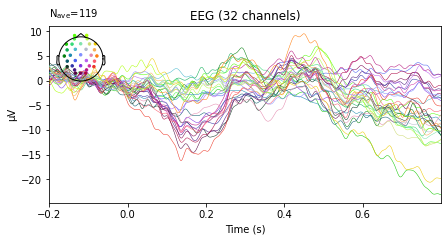

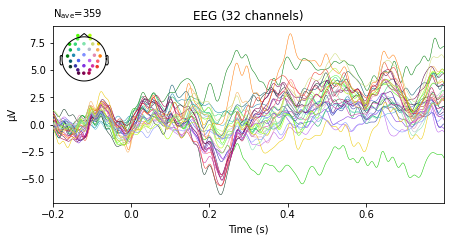

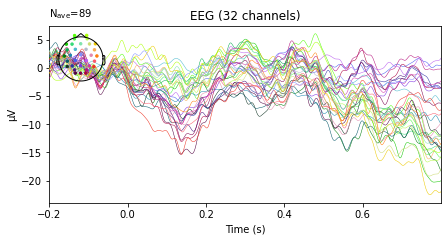

In [9]:
filename = '105a'

path_processed_npy = os.path.join(PATH.processed, "ePod_autoreject", filename + ".npy")
path_processed_events = os.path.join(PATH.processed, "ePod_autoreject", "events", filename + ".txt")

npy = np.load(path_processed_npy)
events_12 = np.loadtxt(path_processed_events, dtype=int)



print(npy.shape)
print(events)  

info = mne.create_info(epodium.channel_names, 2048, ch_types='eeg')

epochs = mne.EpochsArray(npy, info, events=events_12, tmin=-0.2, event_id=epodium.event_dictionary)

montage = mne.channels.make_standard_montage('standard_1020') 
epochs.info.set_montage(montage, on_missing = 'ignore')

evoked_D = epochs['GiepST_D'].average()
evoked_D.plot(spatial_colors = True)

evoked_S = epochs['GiepST_S'].average()
evoked_S.plot(spatial_colors = True)

mmn = mne.combine_evoked([evoked_D, evoked_S], weights = [1, -1])
fig = mmn.plot(spatial_colors = True)


#### Interactive window
Interact with raw EEG data

Using matplotlib as 2D backend.
Opening raw-browser...


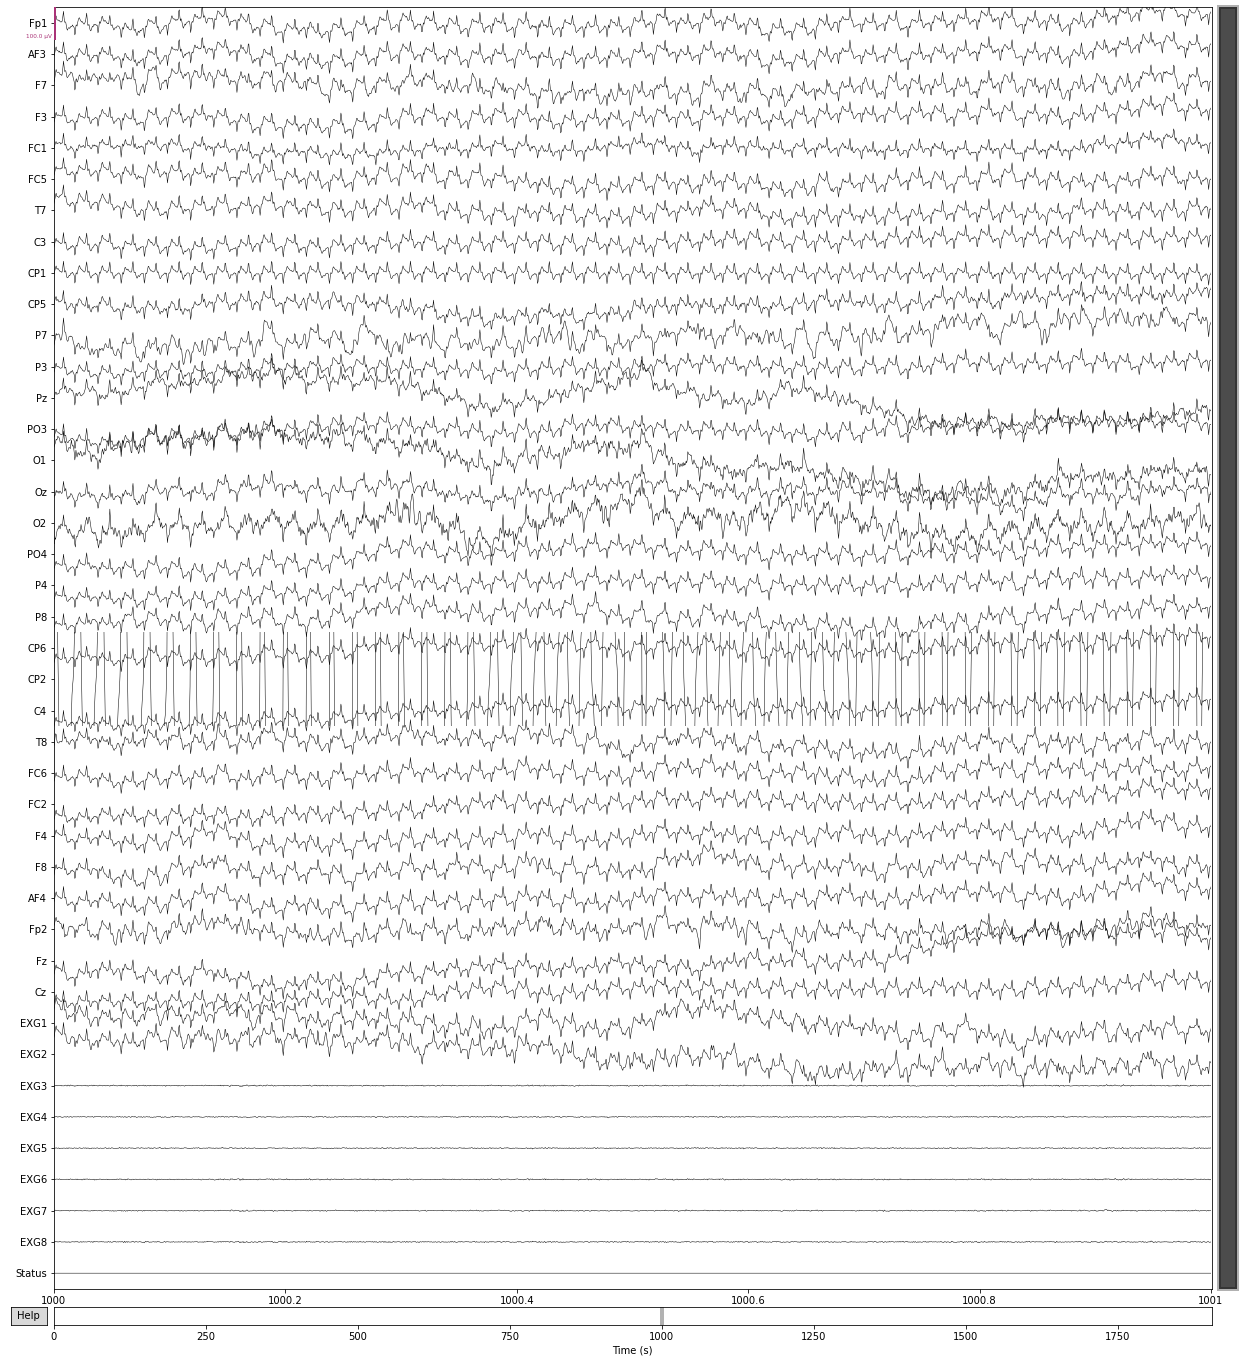

In [4]:
# %matplotlib qt / widget for external/internal interactive window (remove 'fig = ' if no figure shows) (try installing pip install PyQt5 if qt failed due to import binding)
# %matplotlib qt 
fig = mne.viz.plot_raw(epod_raw_preload[participant_index], events[participant_index], n_channels=50, scalings = 50e-6  ,duration = 1, start = 1000)

#### Prepare EEG 

+ Drop unused channels
+ Subtract reference (mastoids) 
+ Detrend 
+ Filter
+ Remove bad channels

epod_raw_preload is used, since some functionalities require preloaded data.


In [5]:
def preprocess_raw(raw):  
    ## Drop unused channels  
    drop_channels = ['EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
    try:
        raw.drop_channels(drop_channels)
    except: print("channels not found")

    ## Subtract reference
    mastoid_channels = ['EXG1', 'EXG2']
    raw = raw.set_eeg_reference(ref_channels=mastoid_channels)

    ## Detrend
    # scipy.signal.detrend

    ## Filter 
    # raw = raw.filter(0.5, 40, fir_design='firwin')

    return raw

epod_raw_filtered = []

for participant_index in range(len(epod_raw_preload)):
    print(f"preprocessing participant {participant_index}")

    epod_raw_filtered.append(preprocess_raw(epod_raw_preload[participant_index])) 

    # Remove bad channels


preprocessing participant 0
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
preprocessing participant 1
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
preprocessing participant 2
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
preprocessing participant 3
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
preprocessing participant 4
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
preprocessing participant 5
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


#### Segment EEG into standard and deviant epochs 
+ subtract baseline
+ Reject artefacts
+ Average to get ERPs (for each subject, event, and channel separately))

#### Calculate Mismatch response 
Deviant minus (-) standard 

Check between subjects to see if the subjects have similar responses

Check between channels to observe which parts of the brain are more influenced by the events


#### Extract features 
+ peak latency
+ peak amplitude
+ mean amplitude


#### Create fitting labels
